In [1]:
import numpy as np
import numpy.linalg as nla
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filters
from scipy.ndimage import rotate
from fractions import Fraction
import math

In [5]:
im = np.array(([0 , 0 , 0 , 0 , 0 , 0 , 0 , 0],
                  [0 , 0 , 0 , 0 , 76, 0 , 0 , 0],
                  [0 , 0 , 0 , 0 , 24, 0 , 0 , 0],
                  [0 , 0 , 0 , 76, 67, 59, 55, 0],
                  [0 , 99, 8 , 0 , 0 , 0 , 51, 0],
                  [0 , 0 ,39 , 0 , 76, 0 , 82, 0],
                  [0 , 0 ,24 , 0 , 0 , 0 , 0 , 0],
                  [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0]))

In [3]:
def hysthresh(im, hi, lo=-1):
    "Hysteresis thresholding of a flating-point image. lo threshold is either specified as arguement 3 of is hi/2.5"
    R,C = im.shape
    hi = im.max() * hi
    if lo ==-1: lo =hi/2.5
    else: lo = im.max()*lo
    
    print("High threshold {:5.3f}, low{:5.3f}".format(hi,lo))
    
    ##pad the image
    imbig = np.zeros((R+2,C+2),dtype=im.dtype)
    imbig[1:R+1,1:C+1] = im
    
    #initial output is all elements>= high threshold
    out = (imbig >hi) * 1
    
    #now do edge linking pass
    changed = True
    passes = 0
    while changed:
        changed = False
        passes += 1
        for r in range(1,R+1):
            for c in range(1,C+1):
                #Set output if input exceeds low thresh, output not already set, and there is at least one 8-neighbour already set
                if imbig[r,c] >=lo and out[r,c] == 0 and\
                np.sum(out[r-1:r+2,c-1:c+2])>0: #nb 8-nbhd check.
                    out[r,c] = 1
                    changed = True
        print("Pass", passes, "    changed", changed)
    #return central region (i.e. remove zero padding)
    return out[1:R+1, 1:C+1]

In [7]:
outim = hysthresh(im,0.8)
print(outim)
#print(hysthresh(im,0.8))

High threshold 79.200, low31.680
Pass 1     changed True
Pass 2     changed True
Pass 3     changed True
Pass 4     changed True
Pass 5     changed False
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0]
 [0 1 0 0 0 0 1 0]
 [0 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


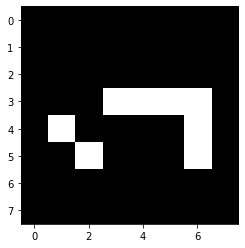

In [8]:
plt.figure()
plt.imshow(outim,cmap='gray')
plt.show()